In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [63]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Student\Downloads\bithi\Job-Placement-Prediction-Salary-Estimation\Data\ds_salaries.csv")
df.head(10)


Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   
5           5       2020               EN              FT   
6           6       2020               SE              FT   
7           7       2020               MI              FT   
8           8       2020               MI              FT   
9           9       2020               SE              FT   

                    job_title    salary salary_currency  salary_in_usd  \
0              Data Scientist     70000             EUR          79833   
1  Machine Learning Scientist    260000             USD         260000   
2           Big Data Engineer     85000             GBP         109024   
3        Product Data Analyst     20000             USD          20000   
4   Machine Learning Engineer    150000             USD         150000   
5                Data Analyst     72000             USD          72000   
6         Lead Data Scientist    190000             USD         190000   
7              Data Scientist  11000000             HUF          35735   
8       Business Data Analyst    135000             USD         135000   
9          Lead Data Engineer    125000             USD         125000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L  
5                 US           100               US            L  
6                 US           100               US            S  
7                 HU            50               HU            L  
8                 US           100               US            L  
9                 NZ            50               NZ            S

In [64]:
# Overview of dataset
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [65]:
# Remove top 1% salary outliers
q99 = df['salary_in_usd'].quantile(0.99)
df = df[df['salary_in_usd'] < q99]


In [66]:
# Step 1: Calculate upper cap using mean + 3 * std
mean_salary = df['salary_in_usd'].mean()
std_salary = df['salary_in_usd'].std()
upper_cap = mean_salary + 3 * std_salary

print(f"üîπ Capping salaries above: {round(upper_cap, 2)}")

# Step 2: Clip extreme salary values to this cap
df['salary_in_usd'] = np.where(df['salary_in_usd'] > upper_cap, upper_cap, df['salary_in_usd'])

# Step 3: Create log-transformed target
df['log_salary'] = np.log1p(df['salary_in_usd'])

# Done ‚úÖ ‚Äî You‚Äôve handled outliers without deleting any rows!


üîπ Capping salaries above: 290637.41


In [67]:
# üîπ Drop unused columns: 'salary' and 'salary_currency'
df_cleaned = df.drop(columns=['salary', 'salary_currency'])

# üîπ Convert 'work_year' to string (optional for encoding later)
df_cleaned['work_year'] = df_cleaned['work_year'].astype(str)

# üîπ Check unique values in categorical columns (optional check)
for col in ['experience_level', 'employment_type', 'job_title', 'employee_residence', 
            'company_location', 'company_size', 'work_year']:
    print(f"{col} - unique values: {df_cleaned[col].nunique()}")


experience_level - unique values: 4
employment_type - unique values: 4
job_title - unique values: 49
employee_residence - unique values: 57
company_location - unique values: 50
company_size - unique values: 3
work_year - unique values: 3


In [68]:
# üîπ Apply one-hot encoding to categorical variables
categorical_cols = ['experience_level', 'employment_type', 'job_title', 
                    'employee_residence', 'company_location', 'company_size', 'work_year']

df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("‚úÖ Encoded DataFrame shape:", df_encoded.shape)
df_encoded.head()


‚úÖ Encoded DataFrame shape: (600, 167)


Unnamed: 0  salary_in_usd  remote_ratio  log_salary  experience_level_EX  \
0           0        79833.0             0   11.287705                False   
1           1       260000.0             0   12.468441                False   
2           2       109024.0            50   11.599332                False   
3           3        20000.0             0    9.903538                False   
4           4       150000.0            50   11.918397                False   

   experience_level_MI  experience_level_SE  employment_type_FL  \
0                 True                False               False   
1                False                 True               False   
2                False                 True               False   
3                 True                False               False   
4                False                 True               False   

   employment_type_FT  employment_type_PT  ...  company_location_SG  \
0                True               False  ...                False   
1                True               False  ...                False   
2                True               False  ...                False   
3                True               False  ...                False   
4                True               False  ...                False   

   company_location_SI  company_location_TR  company_location_UA  \
0                False                False                False   
1                False                False                False   
2                False                False                False   
3                False                False                False   
4                False                False                False   

   company_location_US  company_location_VN  company_size_M  company_size_S  \
0                False                False           False           False   
1                False                False           False            True   
2                False                False            True           False   
3                False                False           False            True   
4                 True                False           False           False   

   work_year_2021  work_year_2022  
0           False           False  
1           False           False  
2           False           False  
3           False           False  
4           False           False  

[5 rows x 167 columns]

#Log Transform Salary (Optional but Recommended)


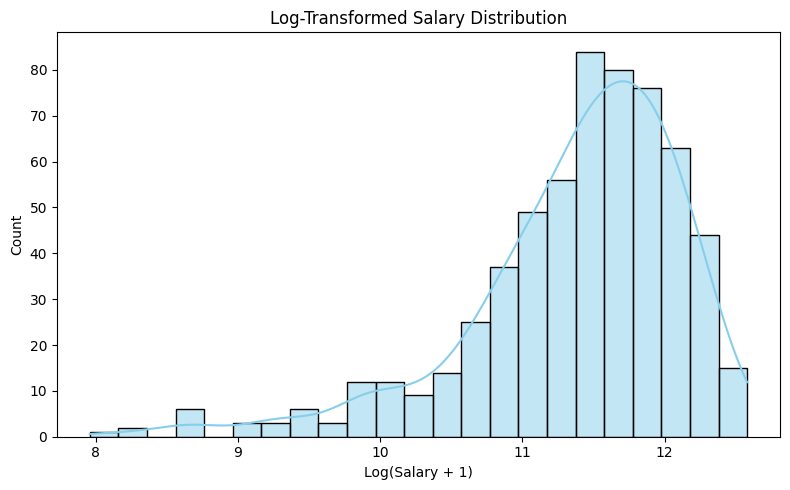

In [69]:
# Add a log-transformed salary column to original df (optional)
df['log_salary'] = np.log1p(df['salary_in_usd'])

# Plot log salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['log_salary'], kde=True, color='skyblue')
plt.title("Log-Transformed Salary Distribution")
plt.xlabel("Log(Salary + 1)")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

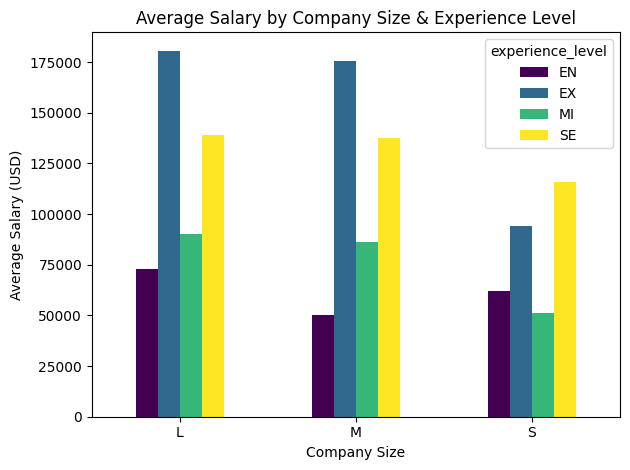

In [70]:
plt.figure(figsize=(10, 6))
grouped = df.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack()
grouped.plot(kind='bar', colormap='viridis')
plt.title("Average Salary by Company Size & Experience Level")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Company Size")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


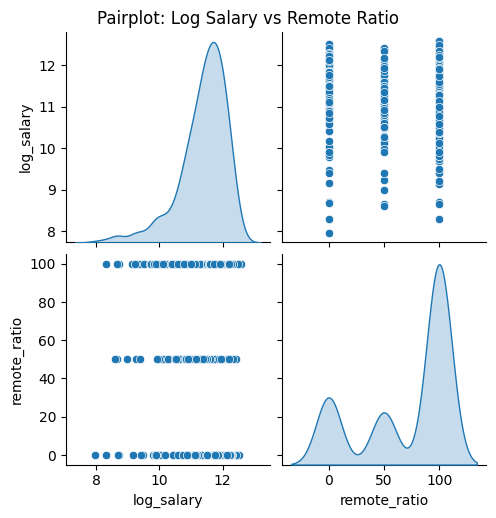

In [71]:
sns.pairplot(df[['log_salary', 'remote_ratio']], diag_kind='kde')
plt.suptitle("Pairplot: Log Salary vs Remote Ratio", y=1.02)
plt.show()


In [72]:
# Features and target
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']

# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (480, 166), Test shape: (120, 166)


In [73]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [74]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [75]:
def evaluate_model(name, y_true, y_pred):
    print(f"üìä {name} Performance:")
    print("R¬≤ Score       :", r2_score(y_true, y_pred))
    print("RMSE           :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("-" * 40)

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)


üìä Linear Regression Performance:
R¬≤ Score       : 0.42331793061881373
RMSE           : 42869.87519921519
----------------------------------------
üìä Random Forest Performance:
R¬≤ Score       : 0.9999294438649065
RMSE           : 474.1889033071363
----------------------------------------


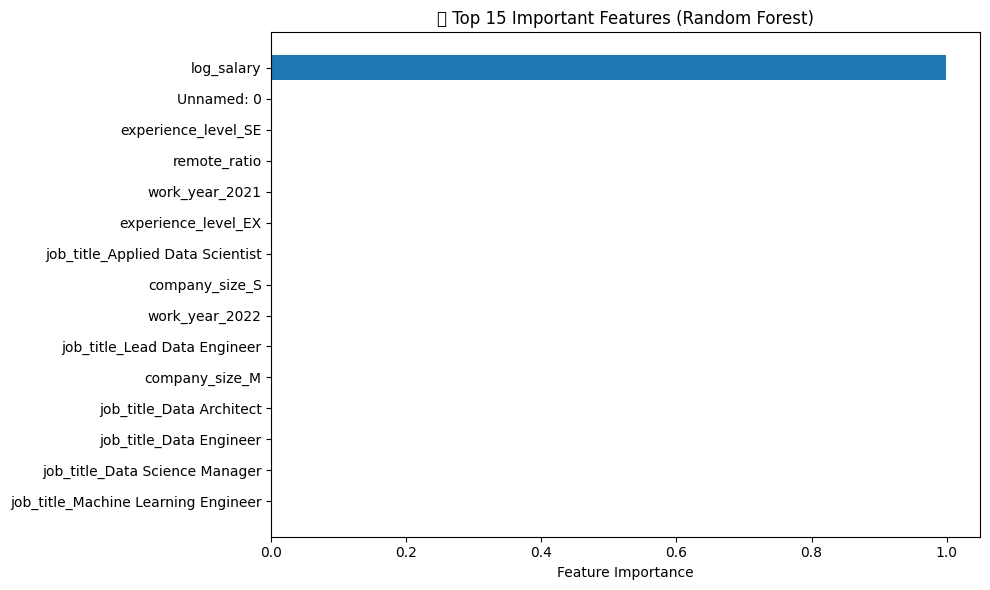

In [76]:
# Create feature importance plot
importances = rf_model.feature_importances_
features = X.columns

# Sort and plot
sorted_idx = np.argsort(importances)[-15:]
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("üîç Top 15 Important Features (Random Forest)")
plt.tight_layout()
plt.show()
